<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


In [2]:
import pandas as pd

df = pd.read_csv(path + "/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
from sklearn.compose   import ColumnTransformer
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [4]:
num = ["sqft_living", "bathrooms", "lat", "long", "sqft_lot", "bedrooms", "yr_built"]
cat = ["zipcode", "waterfront", "condition", "grade"]

In [5]:
X = df[num + cat]
y = df["price"]

In [6]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
pre = ColumnTransformer([
    ("num", "passthrough", num),
    ("cat", OneHotEncoder(drop='first',handle_unknown="ignore"), cat)
])

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [9]:
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

In [10]:
tree = Pipeline([
    ("pre", pre),
    ("dtr", DecisionTreeRegressor(
        max_depth=5,
        min_samples_leaf=10,
        random_state=42,
        min_samples_split = 2
    ))
])

Ahora entrenamos

In [11]:
tree.fit(X_tr,y_tr)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['sqft_living', 'bathrooms',
                                                   'lat', 'long', 'sqft_lot',
                                                   'bedrooms', 'yr_built']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['zipcode', 'waterfront',
                                                   'condition', 'grade'])])),
                ('dtr',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=10,
                                       random_state=42))])

In [12]:
from matplotlib import pyplot as plt

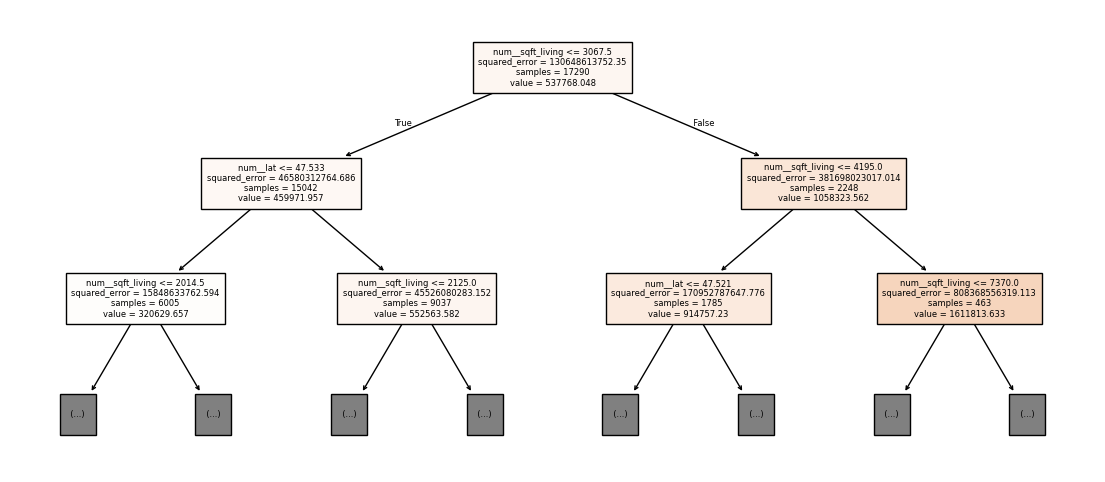

RMSE : 219531.990914777
R²   : 0.6812055619180202


In [13]:
plt.figure(figsize=(14,6))
plot_tree(tree.named_steps["dtr"], feature_names=pre.get_feature_names_out(),
          filled=True, fontsize=6, max_depth=2)
plt.show()

y_pred = tree.predict(X_te)
print("RMSE :", rmse(y_te,y_pred))
print("R²   :", r2_score(y_te,y_pred))

In [14]:
tree = Pipeline([
    ("pre", pre),
    ("dtr", DecisionTreeRegressor(
        max_depth=9,
        min_samples_leaf=10,
        random_state=42,
        min_samples_split = 2
    ))
])

In [15]:
tree.fit(X_tr,y_tr)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['sqft_living', 'bathrooms',
                                                   'lat', 'long', 'sqft_lot',
                                                   'bedrooms', 'yr_built']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['zipcode', 'waterfront',
                                                   'condition', 'grade'])])),
                ('dtr',
                 DecisionTreeRegressor(max_depth=9, min_samples_leaf=10,
                                       random_state=42))])

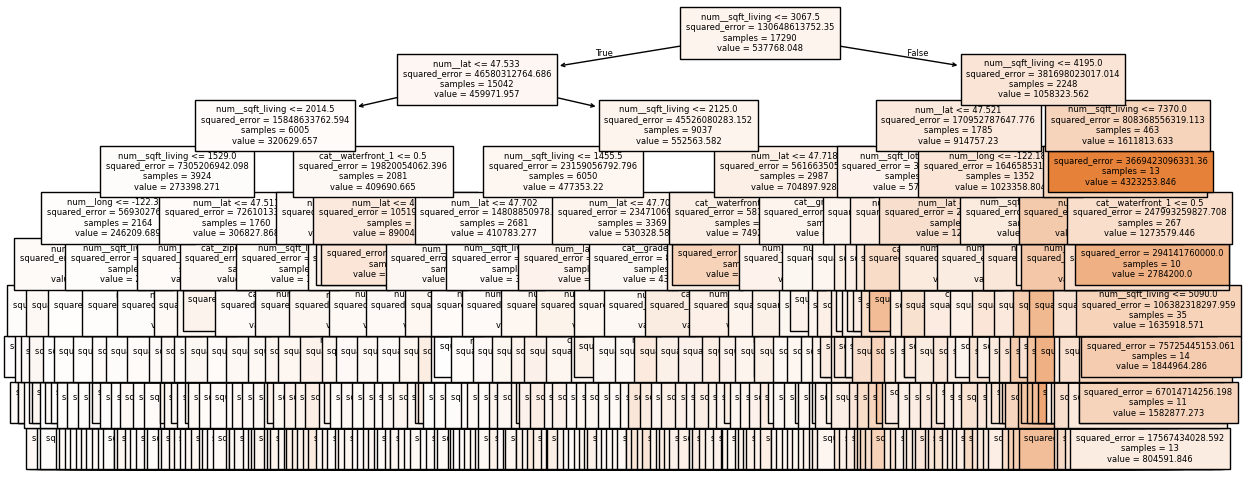

RMSE : 192389.82788927027
R²   : 0.7551617221812926


In [16]:
plt.figure(figsize=(14,6))
plot_tree(tree.named_steps["dtr"], feature_names=pre.get_feature_names_out(),
          filled=True, fontsize=6)
plt.show()

y_pred = tree.predict(X_te)
print("RMSE :", rmse(y_te,y_pred))
print("R²   :", r2_score(y_te,y_pred))

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [27]:
pre = ColumnTransformer([
    ("num", "passthrough", num)
])

In [28]:
pipe = Pipeline([
    ("pre", pre),
    ("dtr", DecisionTreeRegressor(random_state=42))
])

In [29]:
param_grid = {
    "dtr__max_depth": list(range(2, 11))   # 2 … 10
}

In [30]:
rmse_scorer = make_scorer(
        mean_squared_error, greater_is_better=False)

In [31]:
grid = GridSearchCV(pipe,
                    param_grid,
                    cv=5,
                    scoring=rmse_scorer,
                    return_train_score=True,
                    error_score='raise')

In [32]:
grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['sqft_living',
                                                                          'bathrooms',
                                                                          'lat',
                                                                          'long',
                                                                          'sqft_lot',
                                                                          'bedrooms',
                                                                          'yr_built'])])),
                                       ('dtr',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'dtr__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [33]:
depths = grid.cv_results_["param_dtr__max_depth"].data
rmse_val = np.sqrt(-grid.cv_results_["mean_test_score"])
rmse_trn = np.sqrt(-grid.cv_results_["mean_train_score"])

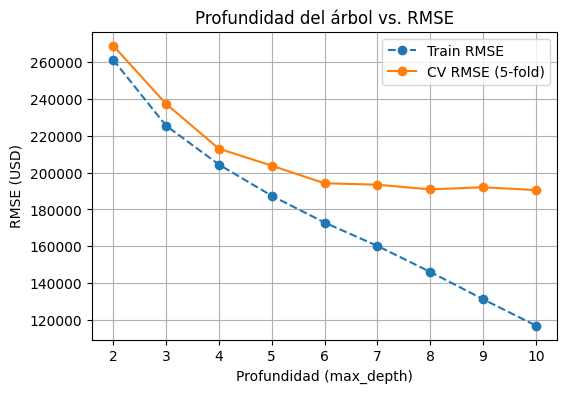

Mejor profundidad: 10
CV-RMSE mínimo  : 190458.79764984729


In [34]:
plt.figure(figsize=(6,4))
plt.plot(depths, rmse_trn, "o--", label="Train RMSE")
plt.plot(depths, rmse_val, "o-",  label="CV RMSE (5-fold)")
plt.xlabel("Profundidad (max_depth)")
plt.ylabel("RMSE (USD)")
plt.title("Profundidad del árbol vs. RMSE")
plt.legend(); plt.grid(True)
plt.show()

print("Mejor profundidad:", grid.best_params_["dtr__max_depth"])
print("CV-RMSE mínimo  :", rmse_val.min())

In [38]:
tree = Pipeline([
    ("pre", pre),
    ("dtr", DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=1,
        random_state=42,
        min_samples_split = 2
    ))
])

In [39]:
tree.fit(X_tr,y_tr)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['sqft_living', 'bathrooms',
                                                   'lat', 'long', 'sqft_lot',
                                                   'bedrooms', 'yr_built'])])),
                ('dtr', DecisionTreeRegressor(max_depth=6, random_state=42))])

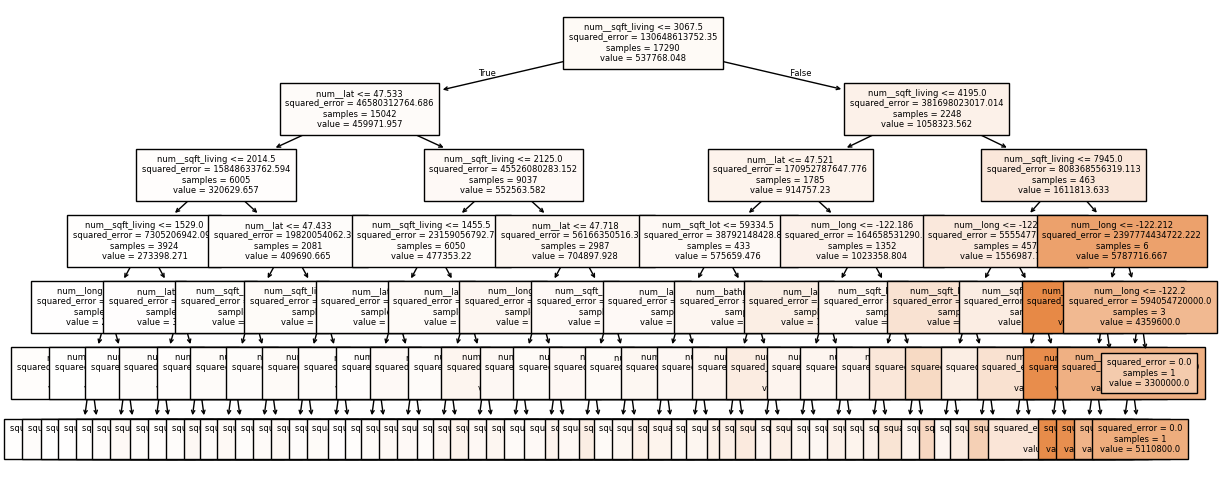

RMSE : 209988.00495279662
R²   : 0.7083217278258026


In [40]:
plt.figure(figsize=(14,6))
plot_tree(tree.named_steps["dtr"], feature_names=pre.get_feature_names_out(),
          filled=True, fontsize=6)
plt.show()

y_pred = tree.predict(X_te)
print("RMSE :", rmse(y_te,y_pred))
print("R²   :", r2_score(y_te,y_pred))

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
pre = ColumnTransformer([
    ("num", "passthrough", num),
    ("cat", OneHotEncoder(drop='first',handle_unknown="ignore"), cat)
])

In [44]:
rf_pipe = Pipeline([
    ("prep", pre),                       # ColumnTransformer
    ("rf",   RandomForestRegressor(
                n_estimators=300,
                max_depth=None,
                random_state=42,
                oob_score=True))
])

In [45]:
rf_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['sqft_living', 'bathrooms',
                                                   'lat', 'long', 'sqft_lot',
                                                   'bedrooms', 'yr_built']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['zipcode', 'waterfront',
                                                   'condition', 'grade'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, oob_score=True,
                                       random_state=42))])

In [46]:
y_pred = rf_pipe.predict(X_te)
print("MAE :", f"{mean_absolute_error(y_te,y_pred):,.0f} USD")
print("RMSE:", f"{rmse(y_te,y_pred):,.0f} USD")
print("R²  :", f"{r2_score(y_te,y_pred):.3f}")
print("OOB R² :", rf_pipe.named_steps["rf"].oob_score_)

# Top-10 importancias
imp = rf_pipe.named_steps["rf"].feature_importances_
feat = rf_pipe.named_steps["prep"].get_feature_names_out()
top10 = (pd.Series(imp, index=feat)
           .sort_values(ascending=False)
           .head(10))
display(top10.to_frame("Importance"))

MAE : 72,614 USD
RMSE: 146,063 USD
R²  : 0.859
OOB R² : 0.8738498799635748


,Importance
num__sqft_living,0.547172
num__lat,0.196607
num__long,0.079838
cat__waterfront_1,0.034640
num__sqft_lot,0.031707
num__yr_built,0.020393
num__bathrooms,0.014944
cat__grade_7,0.008910
cat__grade_8,0.006779
cat__grade_12,0.006174
